In [116]:
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt, floor
from numpy import linspace
from random import sample
from pandas import DataFrame

In [118]:
sizes = [10**3, 10**4, 10**5, 10**6]
ws_k = [2, 4, 6]
fs = linspace(0.1, 0.9, 20)
resultList = []

for size in sizes:
    for k in ws_k:
        rg_beta = k/(size-1)
        ba_m = floor((size-sqrt(size*(size-(2*k))))/2)
        ws = nx.watts_strogatz_graph(size, k, 0.01) 
        rg = nx.fast_gnp_random_graph(size, rg_beta)
        ba = nx.barabasi_albert_graph(size, ba_m)
        print(len(ws.edges), len(rg.edges), len(ba.edges))
        for f in fs:
            ws_c = ws.copy()
            ws_r = sample(range(0, len(ws_c)), floor(f*size))
            for r in ws_r:
                ws_c.remove_node(r)
            ws_gc = len(sorted(nx.connected_components(ws_c), key=len, reverse=True)[0])/len(ws_c)
            rg_c = rg.copy()
            rg_r = sample(range(0, len(rg_c)), floor(f*size))
            for r in rg_r:
                rg_c.remove_node(r)
            rg_gc = len(sorted(nx.connected_components(rg_c), key=len, reverse=True)[0])/len(rg_c)

            ba_c = ba.copy()
            ba_r = sample(range(0, len(ba_c)), floor(f*size))
            for r in ba_r:
                ba_c.remove_node(r)
            ba_gc = len(sorted(nx.connected_components(ba_c), key=len, reverse=True)[0])/len(ba_c)
            resultList.append({
                                'n' : size
                               , 'k' : k
                               , 'f' : f
                               , 'ws_gc' : ws_gc
                               , 'rg_gc' : rg_gc
                               , 'ba_gc' : ba_gc
            })
        
results = DataFrame(resultList)
        

1000 986 999
2000 1931 1996
3000 2959 2991
10000 10024 9999
20000 20117 19996
30000 29774 29991
100000 99533 99999
200000 199908 199996
300000 299737 299991
1000000 1000435 999999
2000000 1999503 1999996
3000000 2997596 2999991


In [119]:
results

,ba_gc,f,k,n,rg_gc,ws_gc
0,0.894444,0.100000,2,1000,0.718889,0.105556
1,0.463869,0.142105,2,1000,0.667832,0.039627
2,0.764706,0.184211,2,1000,0.662990,0.031863
3,0.692506,0.226316,2,1000,0.586563,0.028424
4,0.390710,0.268421,2,1000,0.483607,0.023224
5,0.459420,0.310526,2,1000,0.443478,0.018841
6,0.580247,0.352632,2,1000,0.177469,0.020062
7,0.377888,0.394737,2,1000,0.396040,0.019802
8,0.223404,0.436842,2,1000,0.207447,0.017730
9,0.220307,0.478947,2,1000,0.122605,0.021073


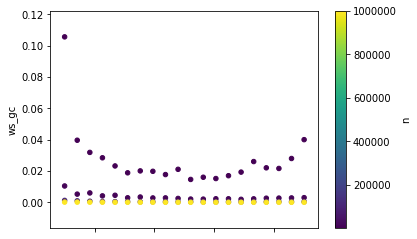

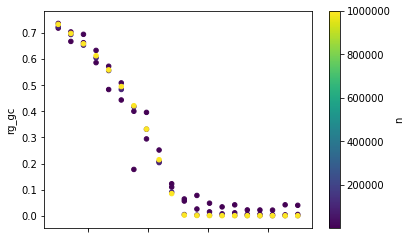

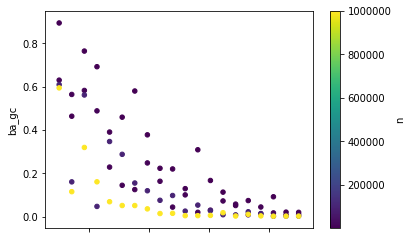

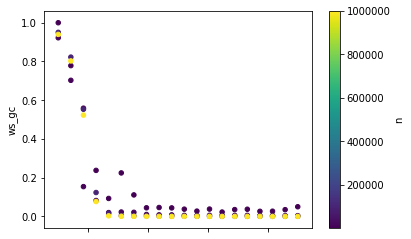

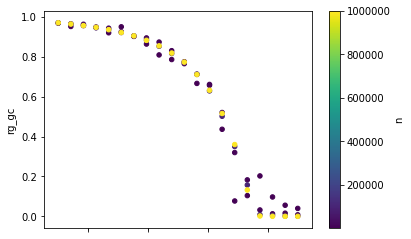

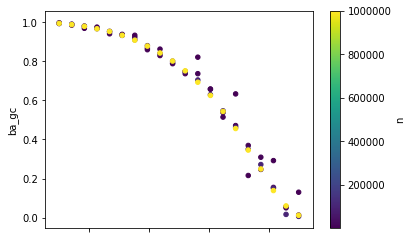

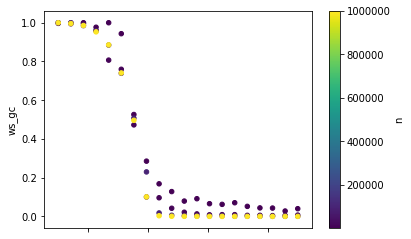

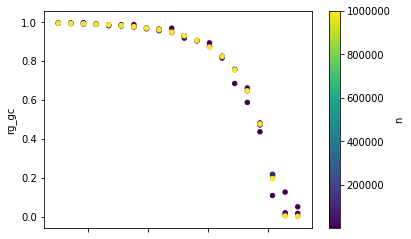

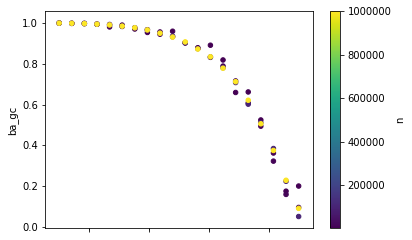

In [120]:
results.where(results["k"]==2).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')

results.where(results["k"]==4).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')

results.where(results["k"]==6).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')

In [131]:
sizes = [10**3, 10**4, 10**5, 10**6]
ws_k = [2, 4, 6]
fs = linspace(0.1, 0.9, 20)
resultList = []

for size in sizes:
    for k in ws_k:
        rg_beta = k/(size-1)
        ba_m = floor((size-sqrt(size*(size-(2*k))))/2)
        ws = nx.watts_strogatz_graph(size, k, 0.01) 
        rg = nx.fast_gnp_random_graph(size, rg_beta)
        ba = nx.barabasi_albert_graph(size, ba_m)
        print(len(ws.edges), len(rg.edges), len(ba.edges))
        for f in fs:
            ws_c = ws.copy()
            ws_r = sorted(ws_c.degree, key = lambda x: x[1], reverse = True)
            ws_r = ws_r[:floor(f*size)]
            for (r, _) in ws_r:
                ws_c.remove_node(r)
            ws_gc = len(sorted(nx.connected_components(ws_c), key=len, reverse=True)[0])/len(ws_c)
            rg_c = rg.copy()
            rg_r = sorted(rg_c.degree, key = lambda x: x[1], reverse = True)
            rg_r = rg_r[:floor(f*size)]
            for (r, _) in rg_r:
                rg_c.remove_node(r)
            rg_gc = len(sorted(nx.connected_components(rg_c), key=len, reverse=True)[0])/len(rg_c)

            ba_c = ba.copy()
            ba_r = sorted(ba_c.degree, key = lambda x: x[1], reverse = True)
            ba_r = ba_r[:floor(f*size)]
            for (r, _) in ba_r:
                ba_c.remove_node(r)
            ba_gc = len(sorted(nx.connected_components(ba_c), key=len, reverse=True)[0])/len(ba_c)
            resultList.append({
                                'n' : size
                               , 'k' : k
                               , 'f' : f
                               , 'ws_gc' : ws_gc
                               , 'rg_gc' : rg_gc
                               , 'ba_gc' : ba_gc
            })
        
results = DataFrame(resultList)
        

1000 984 999
2000 1945 1996
3000 3068 2991
10000 10072 9999
20000 19949 19996
30000 30019 29991
100000 100190 99999
200000 200879 199996
300000 300501 299991
1000000 1000538 999999
2000000 2000433 1999996
3000000 2999300 2999991


In [141]:
resultList2 = resultList[240:]

In [143]:
results = DataFrame(resultList2)

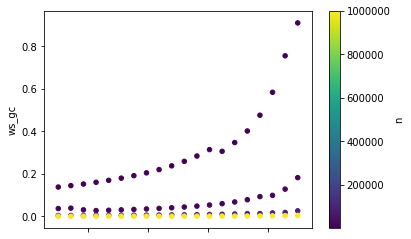

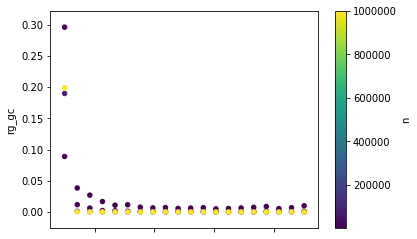

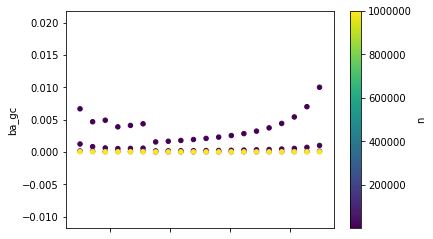

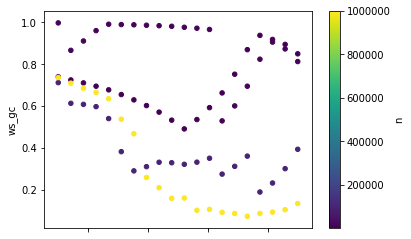

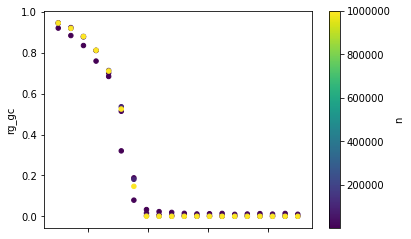

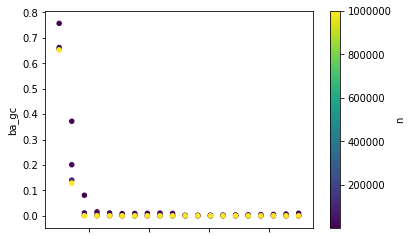

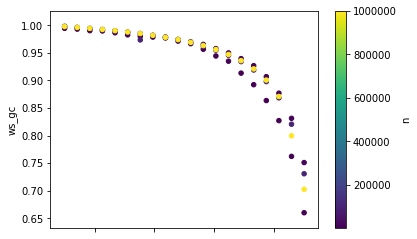

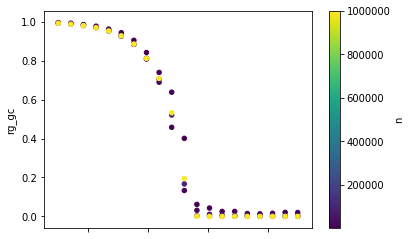

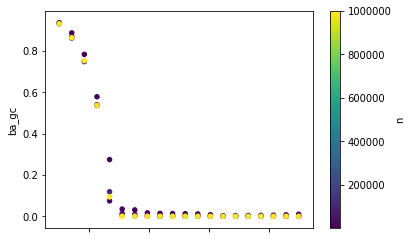

In [144]:
results.where(results["k"]==2).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')

results.where(results["k"]==4).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')

results.where(results["k"]==6).plot.scatter(x="f", y="ws_gc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="rg_gc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="ba_gc",c="n",colormap='viridis')